In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 컬럼 정보

57920개의 데이터

- ID : 샘플 별 고유 id
- 생산년도 : 차량이 생산된 연도
- 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
- 브랜드
- 차량모델명
- 판매도시 : 3글자로 인코딩된 도시 이름 (도시들로 추정)
- 판매구역 : 3글자로 인코딩된 구역 이름 (공항코드)
- 주행거리 : 총 주행 거리(km)
- 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
- 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
- 경유 : 경유 자동차 여부
- 가솔린 : 가솔린 자동차 여부
- 하이브리드 : 하이브리드 자동차 여부
- 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
- 가격 : 자동차 가격(백만원)

In [73]:
df = pd.read_csv('../csv/train.csv')
pd.set_option('display.float_format', '{:.2f}'.format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [74]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00
mean,2011.36,2008.03,167869.09,1788.16,0.00,0.43,0.52,0.01,0.05,52.21
std,5.17,5.09,83191.20,545.41,0.02,0.49,0.50,0.10,0.21,35.40
min,1978.00,1983.00,1.00,875.00,0.00,0.00,0.00,0.00,0.00,1.17
25%,2008.00,2004.00,111434.50,1461.00,0.00,0.00,0.00,0.00,0.00,24.57
50%,2011.00,2008.00,171000.00,1753.00,0.00,0.00,1.00,0.00,0.00,42.25
75%,2016.00,2012.00,220000.00,1995.00,0.00,1.00,1.00,0.00,0.00,73.97
max,2022.00,2021.00,2500000.00,6300.00,1.00,1.00,1.00,1.00,1.00,156.00


In [75]:
# 함수 정의

# 차트 한글폰트
plt.rc('font', family='Malgun Gothic')

# 히스토그램 차트
def hist(df, category, df_name = ''):
    plt.hist(df[category])
    plt.xlabel(category)
    plt.ylabel('빈도')
    plt.title(f'{df_name} {category} 분포')
    plt.show()
    
# 박스플롯 차트
def box(df, category):
    sns.boxplot(data=df[category])
    # 그래프 설정
    plt.xlabel(category)
    plt.title(f'{category} 범위에 대한 분포')
    plt.show()
    

# hist subplot
def make_subplot_layout(df,col_num=4) :
    k = len(df.columns)
    row_num = math.ceil(k/col_num)
    plt.figure(figsize=(col_num*4,row_num*3))
    for i in range(k) : 
        plt.subplot(row_num,col_num,i+1)
        plt.hist(df.iloc[:,i])
        plt.title(df.columns[i])
    plt.tight_layout()
    plt.show()

def barplot(category, xsize=10, ysize=10):
    category_counts = df[category].value_counts()
    # 개수 기준으로 정렬
    sorted_data = category_counts.sort_values(ascending=False)
    plt.figure(figsize=(xsize,ysize))
    sns.barplot(y=sorted_data.index, x=sorted_data.values)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()
    
def regplot(df, x, y='가격'):
    correlation = df[x].corr(df[y])
    sns.regplot(x=x, y=y, data=df)
    plt.title(f'상관계수: {correlation}')
    plt.show()

c:\devtools\Miniconda3\envs\meta\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


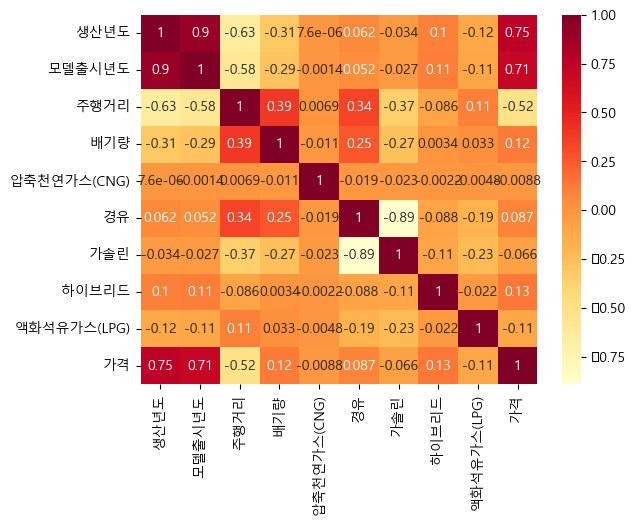

In [76]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlOrRd')

> 가격과 높은 상관계수를 보이는 것은 생산년도, 모델출시년도, 주행거리<br>
> 독립변수간에 생산년도와 모델출시년도가 서로 상관계수가 높음

## 1. 숫자형 데이터 분석

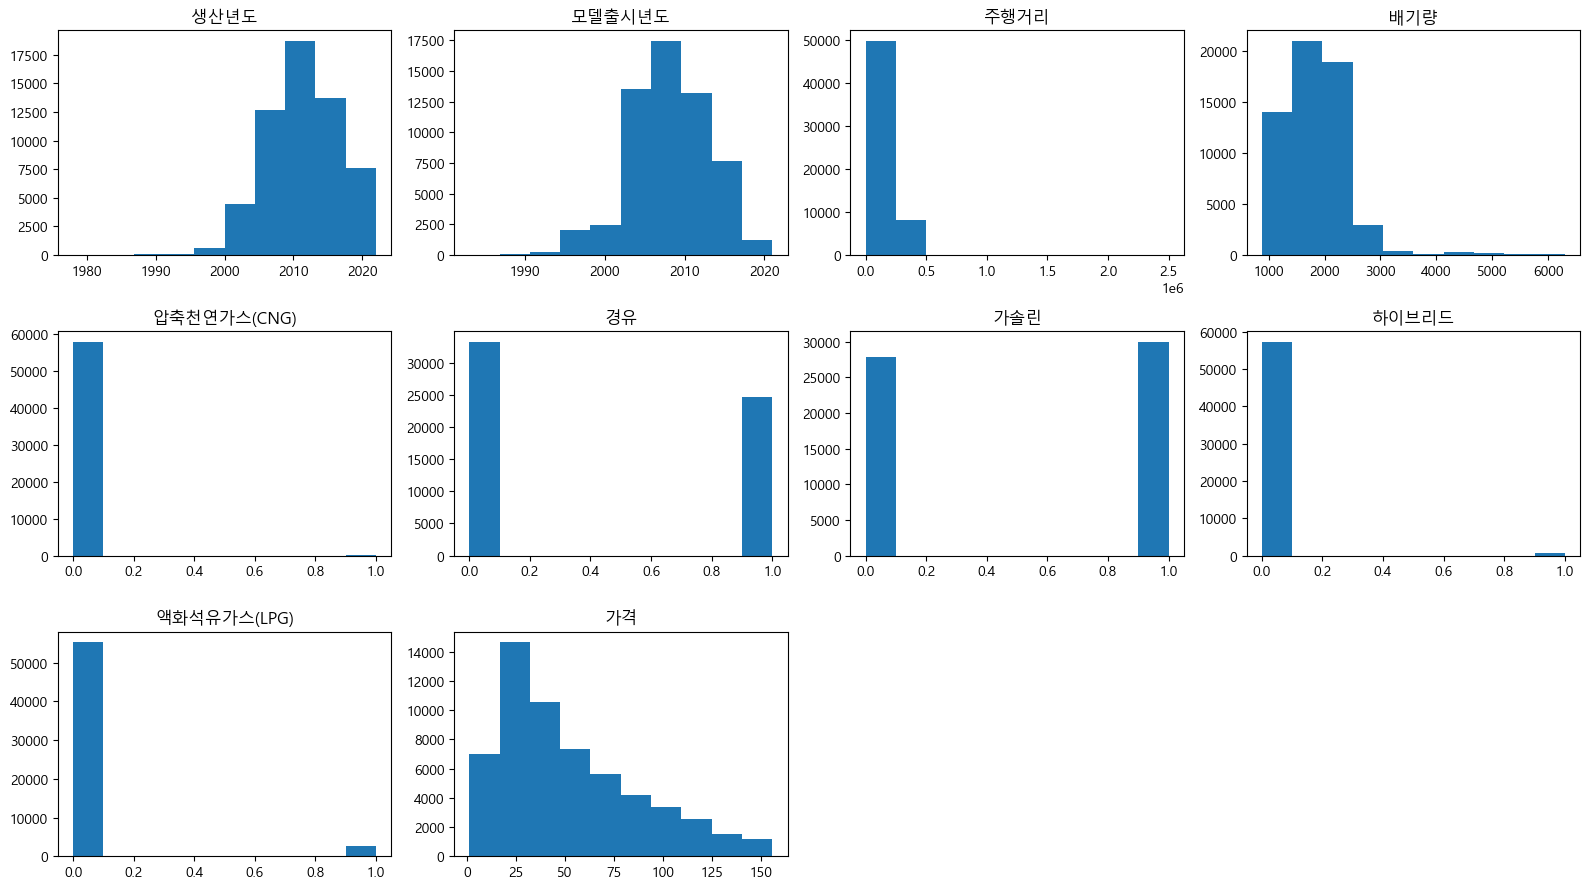

In [77]:
make_subplot_layout(numeric_cols)

### 1.1. 주행거리 분석

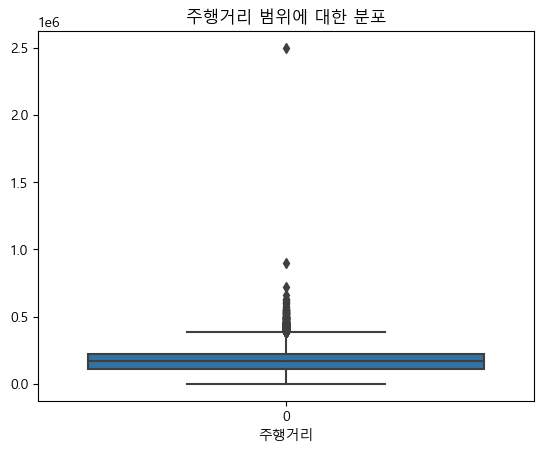

In [78]:
box(df, '주행거리')

In [79]:
sorted_data = df.sort_values(by='주행거리', ascending=False)
sorted_data.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
40808,TRAIN_40808,2014,2014,ford,mondeo,POZ,LUB,2500000,1999,0,0,0,1,0,30.94
57668,TRAIN_57668,2017,2014,mercedes-benz,vito,PIL,WIE,900000,2143,0,1,0,0,0,87.94
21390,TRAIN_21390,2007,2006,mercedes-benz,gl-klasa,KAR,LUU,720000,2987,0,1,0,0,0,55.90
27691,TRAIN_27691,2013,2006,mercedes-benz,sprinter,ILA,WAR,657130,2143,0,1,0,0,0,49.57
16290,TRAIN_16290,2008,2002,opel,vectra,PAN,SLA,631970,1910,0,1,0,0,0,15.59
34462,TRAIN_34462,2015,2003,mercedes-benz,vito,ZSR,LUB,631000,2143,0,1,0,0,0,64.87
55266,TRAIN_55266,2008,2007,volkswagen,tiguan,KAL,WIE,620000,1968,0,1,0,0,0,36.40
57217,TRAIN_57217,2008,2002,mercedes-benz,e-klasa,PAW,SWI,617000,2148,0,1,0,0,0,37.05
26507,TRAIN_26507,2011,2008,skoda,superb,WAR,MAZ,611500,1984,0,0,1,0,0,33.80
5812,TRAIN_05812,2010,2001,renault,trafic,SOS,SLA,602112,1998,0,0,1,0,0,29.77


In [80]:
# 주행거리가 2500000인 것은 이상치라고 판단하여 제거함
df = df[df['주행거리'] != df['주행거리'].max()]

In [81]:
df['주행거리'].describe()

count    57919.00
mean    167828.82
std      82625.58
min          1.00
25%     111433.00
50%     171000.00
75%     220000.00
max     900000.00
Name: 주행거리, dtype: float64

In [82]:
df['주행거리'].quantile(0.02), df['주행거리'].quantile(0.025)

(10.0, 6500.0)

> 상위 2%와 상위 2.5%간의 차이가 크게 존재하는 것을 확인

In [83]:
top_2pct = df['주행거리'].quantile(0.02)
low_km = df[df['주행거리'] <= top_2pct]
low_km.sort_values(by='생산년도')

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
49557,TRAIN_49557,1991,1983,volkswagen,golf,ZGI,LOD,1,1588,0,1,0,0,0,12.87
51779,TRAIN_51779,2019,2012,volkswagen,golf,PLO,MAZ,10,1598,0,1,0,0,0,116.87
35867,TRAIN_35867,2020,2016,fiat,tipo,LOD,LOD,1,999,0,0,1,0,0,99.45
57861,TRAIN_57861,2020,2016,fiat,tipo,JBM,POD,1,1400,0,0,1,0,0,83.19
25314,TRAIN_25314,2020,2018,ford,focus,ELK,WAR,5,999,0,0,1,0,0,114.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47088,TRAIN_47088,2022,2017,volvo,xc-60,GDA,POM,5,1969,0,1,0,0,0,79.95
33326,TRAIN_33326,2022,2017,hyundai,i30,DAB,SLA,7,1498,0,0,1,0,0,104.00
33089,TRAIN_33089,2022,2021,skoda,fabia,KAT,SLA,1,999,0,0,1,0,0,114.59
33913,TRAIN_33913,2022,2015,volkswagen,caddy,LOD,LOD,5,2000,0,1,0,0,0,131.40


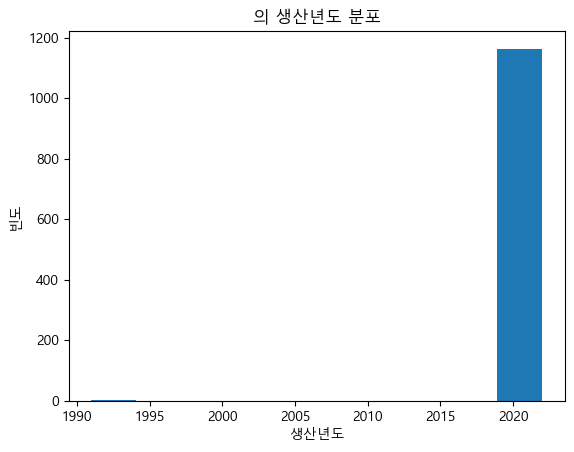

In [84]:
hist(low_km, '생산년도')

> 주행거리가 10km 미만인 데이터 중에서 1991년 생산년도와 2019년도의 데이터를 제외하면, 2020년 이후에 생산된 차량인 것을 확인.
>> 2020년 이후의 출시 모델 중 10km미만 주행거리와 그 외 데이터들을 추출하고 차량모델이 겹치는 데이터들끼리 가격을 비교

두 df에서 겹치는 차량 : {'panda', 'jazz', 'corolla', 'focus', 'octavia', 'ibiza', 'partner', 'i30', 'qashqai', 'aygo', 'tipo', 'elantra', 'doblo', 'golf', '3', 'yaris', 'a-klasa', 'space-star', '3008', 'micra', 'caddy', 'a3', 'clio', 'civic', 'i20', 'tucson', 'xc-60', '2', 'picanto', 'kangoo', 'transit-connect', 'astra', 'megane', 'i10', 'a4', 'superb', 'juke', 'corsa', 'polo', 'q5', 'sportage', 'ceed', 'passat', 'fiesta', 'fabia', 'seria-1'}

    10km 미만의 가격 데이터수 : 1150
    10km 미만의 가격 평균 : 110.84930434782608
    10km 미만의 가격 분산 : 592.9753485147764
    
    그 외 데이터 가격 데이터수 : 963
    그 외 데이터 가격 평균 : 103.04770508826584
    그 외 데이터 가격 분산 : 725.730450757011
    그 외 데이터 주행거리 평균 : 18428.14745586708



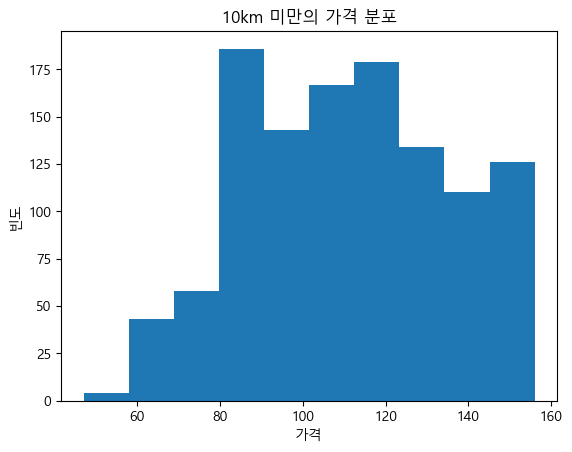

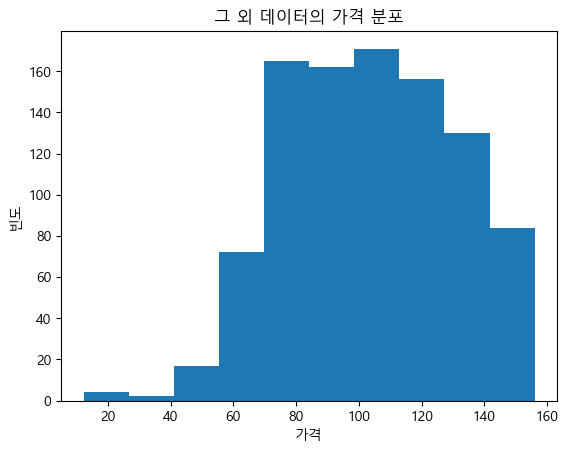

In [85]:
low_km = low_km[low_km['생산년도'] >= 2020]
other_km = df[(df['생산년도'] >= 2020) & (df['주행거리'] > top_2pct)]

# 차량모델 교집합 확인
low_km_list = set(low_km['차량모델명'].unique().tolist())
other_km_list = set(other_km['차량모델명'].unique().tolist())
inter_name_list = low_km_list.intersection(other_km_list)
print(f'두 df에서 겹치는 차량 : {inter_name_list}')

low_km = low_km[low_km['차량모델명'].isin(inter_name_list)]
other_km = other_km[other_km['차량모델명'].isin(inter_name_list)]

print(f'''
    10km 미만의 가격 데이터수 : {len(low_km)}
    10km 미만의 가격 평균 : {low_km['가격'].mean()}
    10km 미만의 가격 분산 : {low_km['가격'].var()}
    
    그 외 데이터 가격 데이터수 : {len(other_km)}
    그 외 데이터 가격 평균 : {other_km['가격'].mean()}
    그 외 데이터 가격 분산 : {other_km['가격'].var()}
    그 외 데이터 주행거리 평균 : {other_km['주행거리'].mean()}
''')

hist(low_km, '가격', '10km 미만')
hist(other_km, '가격', '그 외 데이터')

> 도메인 분석상 주행거리 200km 미만은 신차라고 구분한다. 또한 2년이내의 차량은 주행거리가 20000km가량 차이나더라도 가격의 분포가 비슷한 경향을 보임.
>> 중고차 가격 예측이기도 하고 이상치가 될 수 있다고 판단하여 제거함.

In [86]:
df = df[df["주행거리"] >= 200]

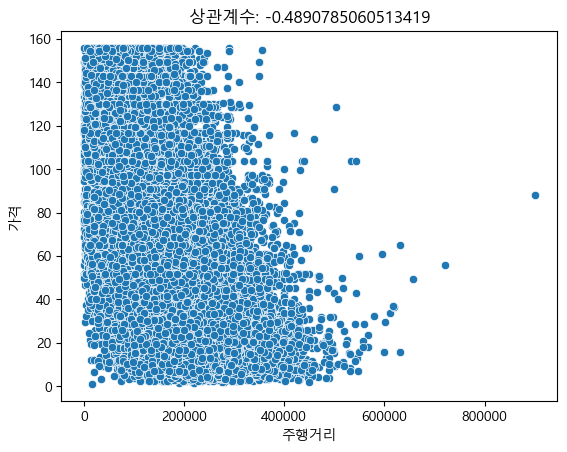

In [87]:
correlation = df['주행거리'].corr(df['가격'])
sns.scatterplot(data= df, x='주행거리', y='가격')
plt.title(f'상관계수: {correlation}')
plt.show()

> 주행거리에 따라 가격이 낮아지는 음의 상관계수를 확인.

> 대부분의 중고차는 연식에 따라 주행거리가 늘어난다. 전체 데이터의 주행거리는 설명력이 부족하다고 판단.
>>그렇다면 같은 출시년도의 같은 차량이어도 주행거리에 따라 가격이 낮아질까?

In [88]:
# 같은 차량(생산년도와 차량모델명이 같음)의 수가 상위 10개인 데이터들로 주행거리를 분석
grouped_data = df.groupby(['생산년도', '차량모델명']) # 고유한 생산년도와 차량모델명을 갖는 로우를 갖는 데이터프레임 생성
model_counts = grouped_data.size().reset_index(name='개수')
most_common_model = model_counts.groupby('생산년도')['개수'].idxmax() # 생산년도별로 가장 많은 차량모델명을 가진 인덱스를 반환
most_common_data = model_counts.loc[most_common_model] # 생산년도별 차량모델명의 개수가 가장 많은 데이터만 저장하게 됌
display(most_common_data.sort_values(by='개수', ascending=False))

,생산년도,차량모델명,개수
1942,2018,octavia,291
1107,2011,astra,274
1842,2017,octavia,252
994,2010,astra,236
753,2008,a4,216
1223,2012,astra,196
613,2006,seria-3,196
913,2009,insignia,193
720,2007,seria-3,170
2002,2019,corolla,167


In [89]:
most_common_data = most_common_data[most_common_data['개수'] >= 100]
year_list = most_common_data['생산년도'].tolist()
name_list = most_common_data['차량모델명'].tolist()
corr_list = []

print('생산년도별 가장 많은 차량모델의 주행거리별 가격의 상관계수')
for year, name in zip(year_list, name_list):
    most_data = df[(df['생산년도'] == year) & (df['차량모델명'] == name)]
    corr = most_data['주행거리'].corr(most_data['가격'])
    print(f"{year}년 {name} : {corr}")
    corr_list.append(corr)
    
print(f'상관계수 평균: {np.mean(corr_list)}')

생산년도별 가장 많은 차량모델의 주행거리별 가격의 상관계수
2002년 a4 : 0.03468090410957893
2004년 a6 : -0.27259199002885576
2005년 a4 : -0.39145265698787773
2006년 seria-3 : -0.2628114652647638
2007년 seria-3 : -0.3491887251565617
2008년 a4 : -0.17674150798069127
2009년 insignia : -0.5946453735176341
2010년 astra : -0.5352933961860284
2011년 astra : -0.5722768938130574
2012년 astra : -0.6379230194816206
2013년 astra : -0.4823421551079084
2014년 astra : -0.5843554802851721
2015년 astra : -0.6459295402509807
2016년 passat : -0.3545531240286864
2017년 octavia : -0.37897368049415026
2018년 octavia : -0.3583256003482891
2019년 corolla : -0.24822547091161593
2020년 corolla : -0.36659969254556923
상관계수 평균: -0.39875271490443803


> 상관계수가 비슷한 수치로 확인.

### 1.2. 배기량 분석

In [90]:
# 배기량에 따른 상관계수도 확인해보자.
# 배기량의 종류가 많은 순으로 df를 뽑음.
grouped_data = df.groupby(['생산년도', '차량모델명'])['배기량'].nunique().reset_index().rename(columns={'배기량':'개수'})
grouped_data.sort_values(by='개수', ascending=False).describe()

,생산년도,개수
count,2167.00,2167.00
mean,2009.93,3.86
std,6.56,2.42
min,1978.00,1.00
25%,2006.00,2.00
50%,2010.00,3.00
75%,2015.00,5.00
max,2021.00,15.00


In [91]:
# 배기량의 종류가 3개 이상인 데이터들로 분석
over_3type_cc = grouped_data[grouped_data['개수'] >= grouped_data['개수'].quantile(0.5)]
# 연도별로 가장 많은 배기량 종류를 갖고있는 차량모델 추출
most_common_model = over_3type_cc.groupby('생산년도')['개수'].idxmax()
most_common_data = over_3type_cc.loc[most_common_model] # 생산년도별 차량모델명의 개수가 가장 많은 데이터만 저장하게 됌
display(most_common_data.sort_values(by='생산년도', ascending=False))


,생산년도,차량모델명,개수
2131,2021,ceed,4
2075,2020,ceed,6
1990,2019,astra,9
1923,2018,focus,13
1842,2017,octavia,14
1711,2016,focus,14
1595,2015,focus,11
1499,2014,leon,10
1390,2013,octavia,9
1270,2012,megane,10


In [92]:
year_list = most_common_data['생산년도'].tolist()
name_list = most_common_data['차량모델명'].tolist()

print('생산년도별 가장 많은 배기량 종류를 가진 차량의 cc별 가격의 상관계수')
for year, name in zip(year_list, name_list):
    most_data = df[(df['생산년도'] == year) & (df['차량모델명'] == name)]
    corr = most_data['배기량'].corr(most_data['가격'])
    print(f"{year}년 {name} : {corr}")
    corr_list.append(corr)
    
print(f'상관계수 평균: {np.mean(corr_list)}')

생산년도별 가장 많은 배기량 종류를 가진 차량의 cc별 가격의 상관계수
1990년 golf : -0.4257039143781145
1991년 golf : 0.5689580896239169
1992년 80 : 0.5978593787847751
1993년 80 : 0.5412154324541376
1994년 e-klasa : 0.7672464753992244
1995년 e-klasa : 0.6142176071024227
1996년 a4 : 0.11930171611219943
1997년 seria-5 : 0.36816891968335475
1998년 seria-3 : 0.45736773142656895
1999년 a3 : 0.16345164971011747
2000년 a6 : 0.37263921134164046
2001년 a6 : 0.5491533159978852
2002년 a6 : 0.08875274407756512
2003년 e-klasa : 0.625776130138598
2004년 a6 : 0.5038527341489617
2005년 a4 : 0.15758938999260966
2006년 focus : 0.7888138381118399
2007년 a3 : 0.29187189158027976
2008년 a4 : 0.31903957226584123
2009년 golf : 0.09745847491093156
2010년 astra : -0.21959676641961312
2011년 megane : 0.4257260315422816
2012년 megane : 0.4996284545128633
2013년 octavia : 0.6237592285685938
2014년 leon : 0.5969853211994782
2015년 focus : 0.25525103973337987
2016년 focus : 0.5416257597781511
2017년 octavia : 0.43681950062766706
2018년 focus : -0.1225643315645014
2019년 ast

> 특정 차량에선 오히려 음의 상관계수를 확인. 해당 데이터를 분석

In [93]:
# 비교적 최근인 2019년 astra 데이터로 분석
astra_2019 = df[(df['생산년도']== 2019) & (df['차량모델명'] == 'astra')]
astra_2019.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00
mean,2019.00,2014.10,57507.42,1402.35,0.00,0.21,0.79,0.00,0.00,85.20
std,0.00,2.15,36620.06,137.11,0.00,0.41,0.41,0.00,0.00,11.80
min,2019.00,2009.00,202.00,998.00,0.00,0.00,0.00,0.00,0.00,37.44
25%,2019.00,2015.00,31094.00,1399.00,0.00,0.00,1.00,0.00,0.00,78.00
50%,2019.00,2015.00,56000.00,1399.00,0.00,0.00,1.00,0.00,0.00,85.67
75%,2019.00,2015.00,78000.00,1399.00,0.00,0.00,1.00,0.00,0.00,91.00
max,2019.00,2015.00,186345.00,1600.00,0.00,1.00,1.00,0.00,0.00,113.88


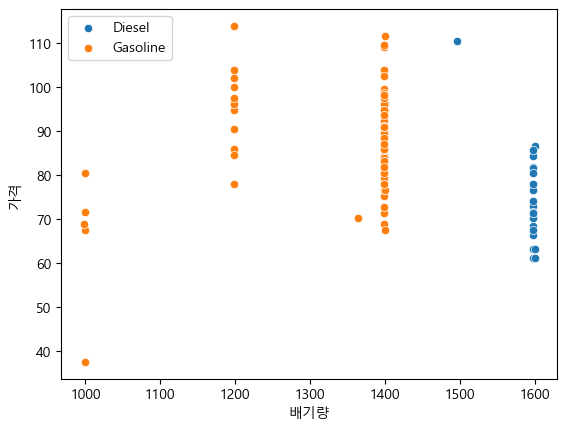

In [94]:
# 경유와 가솔린의 차이인지 분석
astra_2019_diesel = astra_2019[(astra_2019['경유'] == 1)]
astra_2019_gasoline = astra_2019[(astra_2019['가솔린'] == 1)]

sns.scatterplot(data =astra_2019_diesel, x='배기량', y='가격', label='Diesel')
sns.scatterplot(data=astra_2019_gasoline,x='배기량', y='가격',label='Gasoline')
plt.xlabel('배기량')
plt.ylabel('가격')
plt.legend()
plt.show()

> 2019 astra 데이터에서는 배기량이 높아도 경유차라면 가격이 낮아지는 것을 확인함

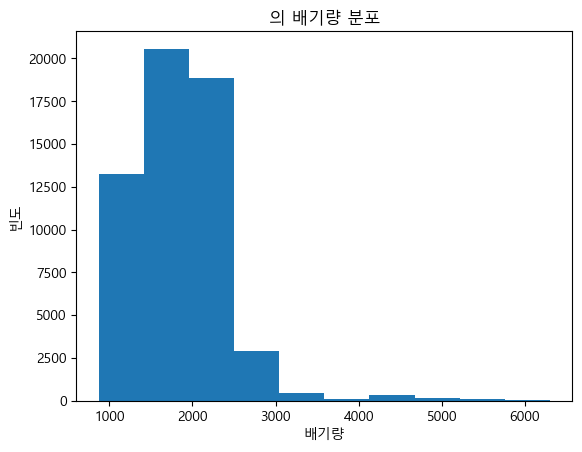

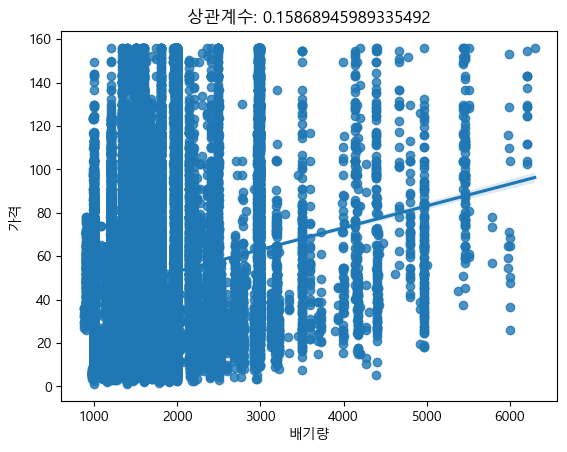

In [95]:
# 전체 데이터에서의 배기량
hist(df, '배기량')
regplot(df, '배기량')

> 특정 차량모델에서의 배기량은 높은 양의 상관계수를 확인. 심지어 대부분 0.5를 넘는다.<br>
>> 하지만 전체데이터에서는 매우 약한 상관관계를 나타냄.<br>
3000cc 이상의 데이터가 극소량인게 이유일까?

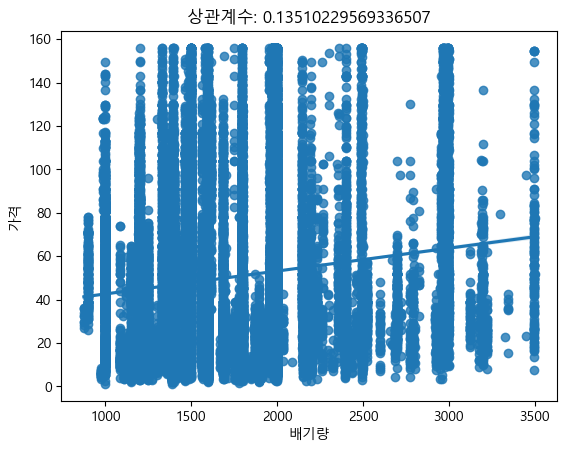

In [96]:
# 3500cc 이하의 데이터들의 상관관계
low_3500cc = df[df['배기량'] <= 3500]
regplot(low_3500cc, '배기량')

> 특정모델과 전체 데이터를 분석한 결과 배기량이 같아도 경유와 가솔린의 차이에 따른 분석이 필요하다고 판단.

### 1.3. 경유와 가솔린

In [97]:
## 전체 데이터의 경우
diesel = df[df['경유'] == 1]
gasoline = df[df['가솔린'] == 1]
cng = df[df['압축천연가스(CNG)'] == 1]
lpg = df[df['액화석유가스(LPG)']==1]
hybrid = df[df['하이브리드']==1]

print(f'''
      {(diesel.shape[0])}
      {(gasoline.shape[0])}
      {(cng.shape[0])}
      {(lpg.shape[0])}
      {len(hybrid)}
      개수 확인: {(len(diesel)+len(gasoline)+len(cng)+len(lpg)+len(hybrid)) == len(df)}
      ''')


      24545
      28954
      28
      2628
      543
      개수 확인: True
      


In [98]:

# 경유와 가솔린 두 가지 모델이 동시에 존재하는 차량모델 확인
diesel['생산년도_모델명'] = diesel['생산년도'].astype(str) +'_'+ diesel['차량모델명']
gasoline['생산년도_모델명'] = gasoline['생산년도'].astype(str)+'_' + gasoline['차량모델명']
df['생산년도_모델명'] = df['생산년도'].astype(str)+'_' + df['차량모델명']

car_list = set(diesel['생산년도_모델명'].to_list()).intersection(set(gasoline['생산년도_모델명'].to_list()))
display(len(diesel['생산년도_모델명'].to_list()),len(gasoline['생산년도_모델명'].to_list()),len(car_list))

C:\Users\user\AppData\Local\Temp\ipykernel_4420\712300653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel['생산년도_모델명'] = diesel['생산년도'].astype(str) +'_'+ diesel['차량모델명']
C:\Users\user\AppData\Local\Temp\ipykernel_4420\712300653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoline['생산년도_모델명'] = gasoline['생산년도'].astype(str)+'_' + gasoline['차량모델명']


24545

28954

1447

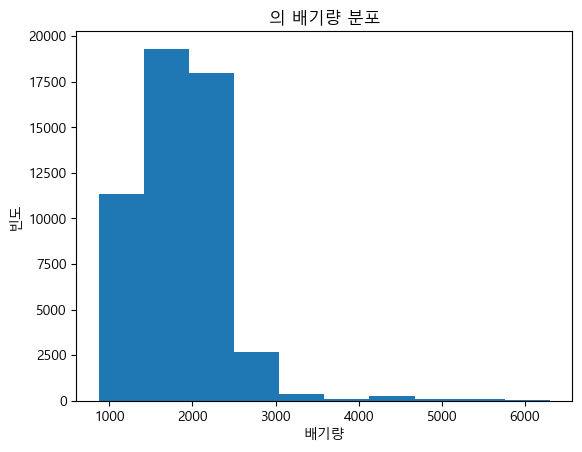

In [103]:
filtered_df = df[df['생산년도_모델명'].isin(car_list)]

### 1.4. 생산년도와 모델출시년도

In [22]:
df['생산년도'].corr(df['모델출시년도'])

0.8950956290441067

> 독립변수인 생산년도와 모델출시년도는 굉장히 높은 상관관계를 띔.

In [23]:
df['나이'] = df['생산년도'] - df['모델출시년도']
df['나이'].describe()

count   56698.00
mean        3.29
std         2.29
min       -26.00
25%         1.00
50%         3.00
75%         5.00
max        20.00
Name: 나이, dtype: float64

> 백분위 50의 값을 기준으로 생산년도와 모델출시년도의 가격과 상관관계를 각각 비교해 봄.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


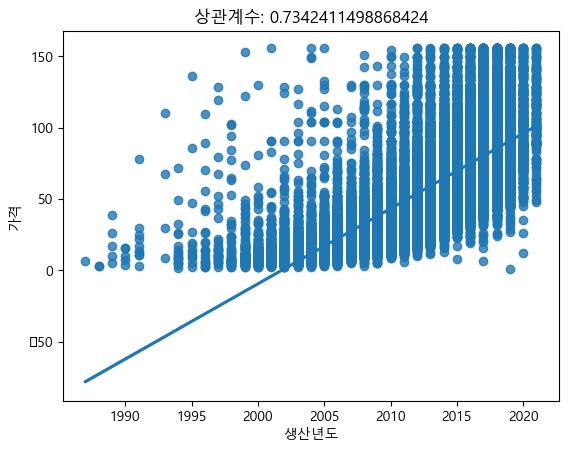

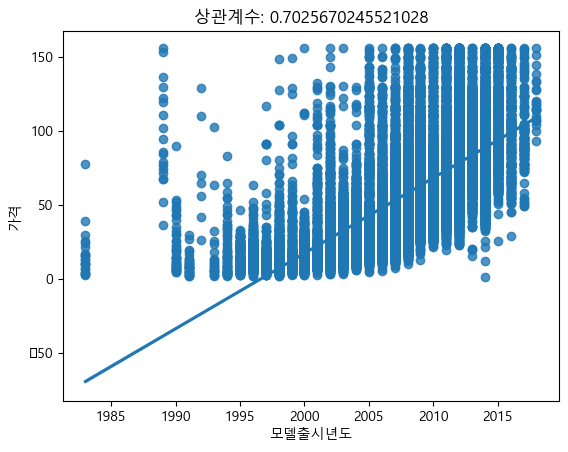

In [24]:
over_3_age = df[df['나이'] >= 3]

regplot(over_3_age, '생산년도')
regplot(over_3_age, '모델출시년도')

> 생산년도와 모델출시년도의 차이가 3년이상이어도 상관계수는 비슷하며 데이터의 분포도 비슷한 경향을 띔.
>> 가격과 조금 더 상관관계가 높은 생산년도만 사용하는게 나아보임.

In [25]:
df.drop('모델출시년도', axis=1, inplace=True)

In [26]:
df.drop('나이', axis=1, inplace=True)

In [27]:
df['연평균주행거리'] = df['주행거리'] / (2022 - df['생산년도'])

df['연평균주행거리'].describe()

count    56698.00
mean     17156.56
std       8212.68
min         67.33
25%      11813.87
50%      15500.00
75%      20732.58
max     180000.00
Name: 연평균주행거리, dtype: float64

In [28]:
df.sort_values(by='연평균주행거리', ascending=True)

,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
12164,TRAIN_12164,2019,opel,astra,BEL,LOD,202,1199,0,0,1,0,0,99.97,67.33
18382,TRAIN_18382,2016,mazda,3,GRU,KUJ,415,1998,0,0,1,0,0,72.67,69.17
48420,TRAIN_48420,2019,opel,astra,KRA,MAL,266,1199,0,0,1,0,0,78.00,88.67
22266,TRAIN_22266,2019,opel,astra,LOD,LOD,300,1199,0,0,1,0,0,103.87,100.00
49755,TRAIN_49755,2020,opel,astra,WAR,MAZ,250,1199,0,0,1,0,0,116.87,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30368,TRAIN_30368,2021,skoda,fabia,RYB,SLA,99456,999,0,0,0,0,1,62.27,99456.00
32672,TRAIN_32672,2018,bmw,seria-5,POZ,WIE,400000,1998,0,0,1,0,0,99.97,100000.00
28668,TRAIN_28668,2018,mercedes-benz,sprinter,NRQ,LOD,420000,2143,0,1,0,0,0,116.87,105000.00
44453,TRAIN_44453,2021,volkswagen,passat,BUL,SLA,130000,1968,0,1,0,0,0,100.10,130000.00


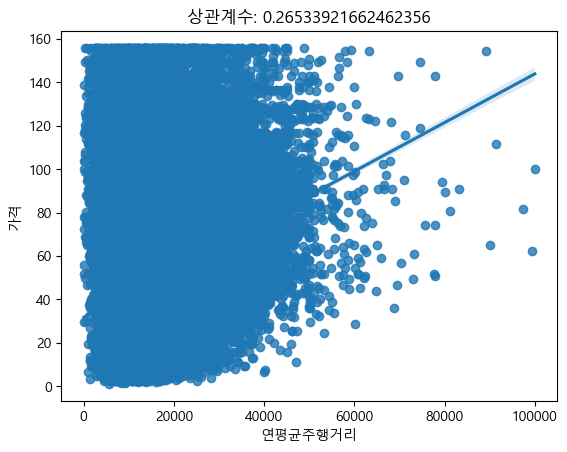

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


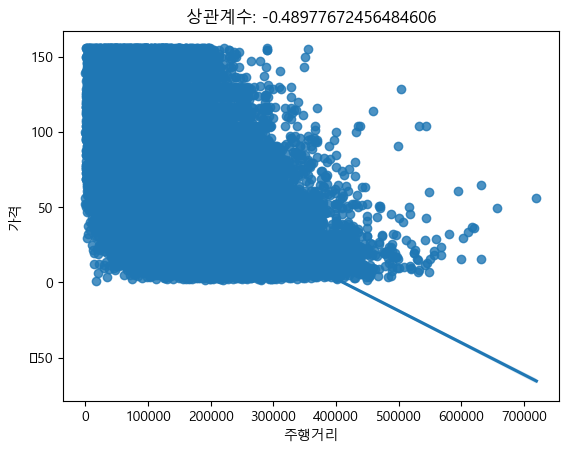

In [29]:
df = df[df['연평균주행거리'] <= 100000]

regplot(df, '연평균주행거리')
regplot(df, '주행거리')

> 연평균주행거리를 계산하여 이상치로 추정한 값들을 제외했을 때 주행거리의 상관계수가 0.8만큼 증가
>> 구매자들은 상대적인 주행거리보다 절대적인 주행거리 수치에 주목하는 것을 확인.

## 2. 범주형 데이터 분석

### 2.1. 브랜드

In [30]:
df.head(10)

,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
0,TRAIN_00000,2018,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74,21307.75
1,TRAIN_00001,2010,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47,11250.00
2,TRAIN_00002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81,12761.15
3,TRAIN_00003,2006,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20,14875.00
4,TRAIN_00004,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55,16733.33
5,TRAIN_00005,2001,audi,a4,KAT,SLA,340000,1984,0,0,0,0,1,7.80,16190.48
7,TRAIN_00007,2005,volkswagen,passat,ELB,WAR,217850,1595,0,0,1,0,0,20.80,12814.71
8,TRAIN_00008,2018,skoda,fabia,OPO,OPO,98514,1000,0,0,1,0,0,62.27,24628.50
9,TRAIN_00009,2011,citroen,c4-picasso,LUB,LUB,201000,1560,0,1,0,0,0,28.47,18272.73
10,TRAIN_00010,2011,bmw,seria-5,ZGO,DOL,224000,1995,0,1,0,0,0,78.00,20363.64


In [31]:
df['브랜드'].unique()

array(['skoda', 'toyota', 'mercedes-benz', 'nissan', 'fiat', 'audi',
       'volkswagen', 'citroen', 'bmw', 'opel', 'ford', 'mazda', 'honda',
       'kia', 'seat', 'renault', 'volvo', 'peugeot', 'hyundai',
       'mitsubishi'], dtype=object)

> 결측치라고 볼 수 있는 데이터는 없음.

In [32]:
df['브랜드'].value_counts()

opel             6561
ford             5771
volkswagen       5612
audi             5590
bmw              5260
renault          3684
toyota           3192
skoda            3047
mercedes-benz    2893
nissan           2084
kia              1903
hyundai          1667
seat             1615
mazda            1563
honda            1514
volvo            1351
citroen          1127
fiat              970
peugeot           789
mitsubishi        502
Name: 브랜드, dtype: int64

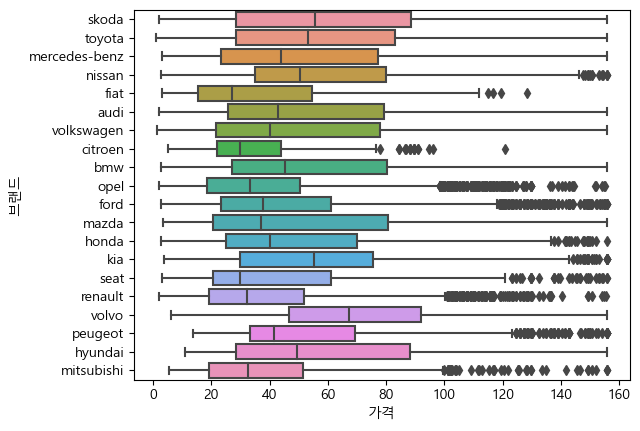

In [33]:
sns.boxplot(x='가격', y='브랜드', data=df)
plt.show()

> 이상치가 대략 120이상 구간에 모여있는 것을 확인.
>> 저가모델과 고가모델의 차이인지 알아보기

In [34]:
# ford브랜드를 통해 가격이 60이하인 것과 120이상인 것의 차량모델정보를 확인
under_price = df[(df['브랜드'] == 'ford') & (df['가격'] < 60)]
over_price = df[(df['브랜드'] == 'ford') & (df['가격'] >= 120)]

display(under_price.head(10),over_price.head(10))

,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
12,TRAIN_00012,2009,ford,galaxy,PLO,MAZ,236424,1997,0,1,0,0,0,33.67,18186.46
25,TRAIN_00025,2005,ford,c-max,JWZ,SWI,140000,1798,0,0,1,0,0,16.38,8235.29
32,TRAIN_00032,2005,ford,focus,MAR,WIE,187000,1596,0,0,1,0,0,19.11,11000.00
50,TRAIN_00050,2015,ford,focus,ZSR,LUB,143000,1498,0,1,0,0,0,57.85,20428.57
53,TRAIN_00053,2010,ford,focus,LOD,LOD,110858,1596,0,0,1,0,0,28.47,9238.17
57,TRAIN_00057,2011,ford,mondeo,SYB,SLA,213000,1997,0,1,0,0,0,25.87,19363.64
62,TRAIN_00062,2007,ford,focus,GRU,KUJ,219500,1596,0,0,0,0,1,16.77,14633.33
64,TRAIN_00064,2009,ford,focus,UEI,DOL,123000,1596,0,0,1,0,0,23.27,9461.54
107,TRAIN_00107,2014,ford,focus,PIA,MAZ,105186,999,0,0,1,0,0,44.20,13148.25
130,TRAIN_00130,2004,ford,c-max,SWA,WIE,148000,1596,0,0,1,0,0,12.87,8222.22


,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
121,TRAIN_00121,2018,ford,mondeo,GMH,MAL,43294,1999,0,0,0,1,0,150.67,10823.50
1102,TRAIN_01102,2018,ford,mondeo,GDY,POM,41518,1999,0,0,1,0,0,124.67,10379.50
1206,TRAIN_01206,2017,ford,kuga,PLO,MAZ,58344,1997,0,1,0,0,0,123.37,11668.80
1212,TRAIN_01212,2019,ford,kuga,WAR,MAZ,25142,1498,0,0,1,0,0,136.37,8380.67
1848,TRAIN_01848,2018,ford,mondeo,GDY,POM,104598,1997,0,1,0,0,0,120.77,26149.50
1967,TRAIN_01967,2017,ford,mondeo,POO,DOL,49706,1997,0,1,0,0,0,148.07,9941.20
2001,TRAIN_02001,2019,ford,mondeo,ELB,WAR,52800,1498,0,0,1,0,0,123.11,17600.00
2101,TRAIN_02101,2017,ford,s-max,WAR,MAZ,136100,1997,0,1,0,0,0,132.34,27220.00
2462,TRAIN_02462,2019,ford,mondeo,KRA,MAL,12777,1999,0,0,0,1,0,129.87,4259.00
2637,TRAIN_02637,2021,ford,focus,BYT,SLA,13500,999,0,0,1,0,0,144.17,13500.00


가격이 60 미만인 ford 차종 : ['galaxy' 'c-max' 'focus' 'mondeo' 'fiesta' 's-max' 'kuga' 'ka' 'transit'
 'transit-connect']


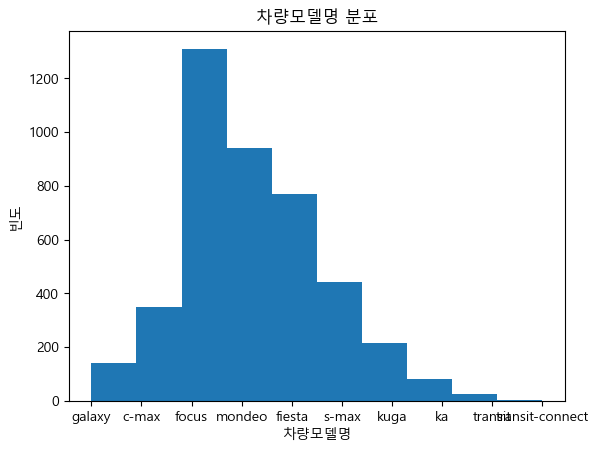

가격이 120 이상인 ford 차종 : ['mondeo' 'kuga' 's-max' 'focus' 'transit' 'galaxy' 'fiesta']


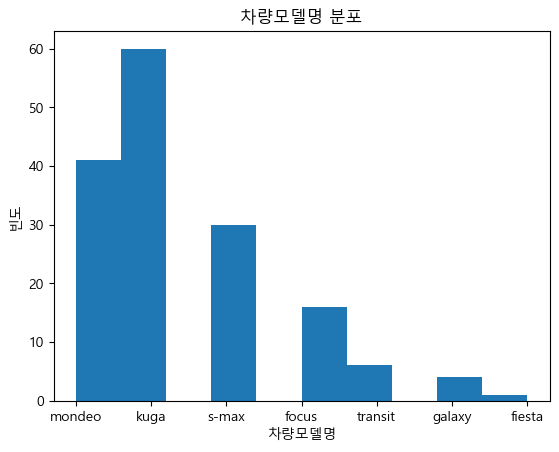

In [35]:
print(f'가격이 60 미만인 ford 차종 : {under_price["차량모델명"].unique()}')
hist(under_price, '차량모델명')
print(f'가격이 120 이상인 ford 차종 : {over_price["차량모델명"].unique()}')
hist(over_price, '차량모델명')

In [36]:
set1 = set(under_price["차량모델명"].unique())
set2 = set(over_price["차량모델명"].unique())

intersection = set1.intersection(set2)

result = list(intersection)

print(f'교집합 : {result}')

교집합 : ['transit', 's-max', 'focus', 'fiesta', 'galaxy', 'mondeo', 'kuga']


> ford사의 focus는 60이하의 가격에서 가장 많은 분포를 보이지만 120이상의 가격에서도 소수의 데이터가 존재.
>> 저가형 모델로 추정되는 focus를 통해 고가의 focus와 비교

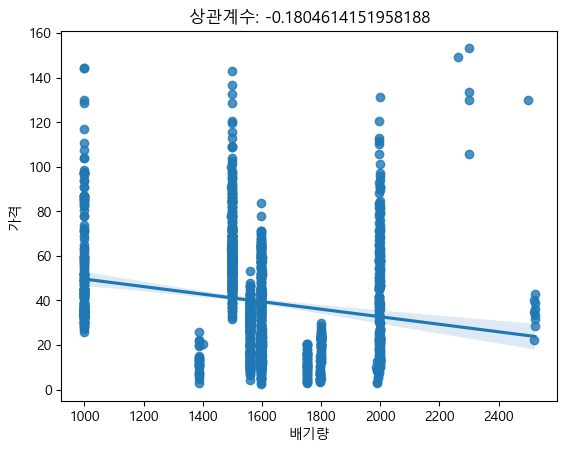

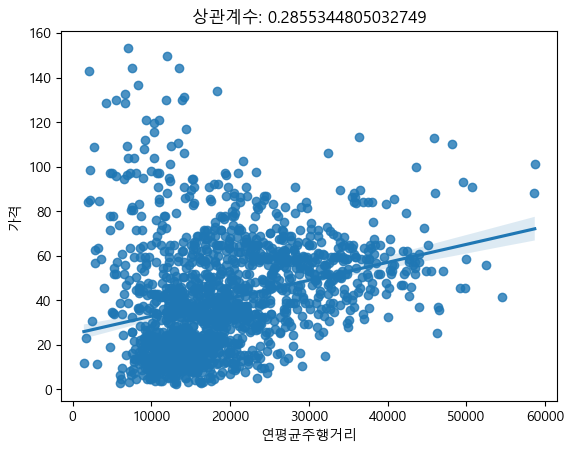

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


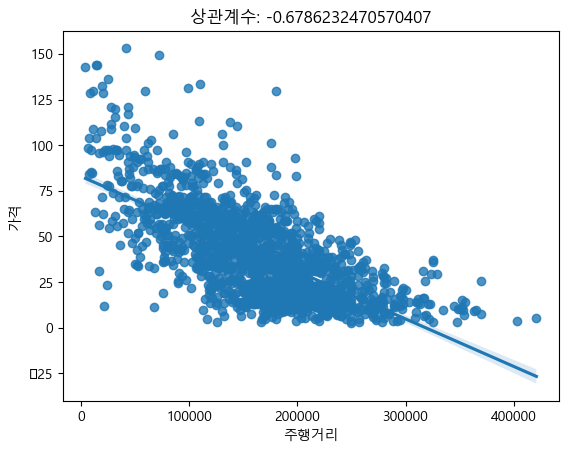

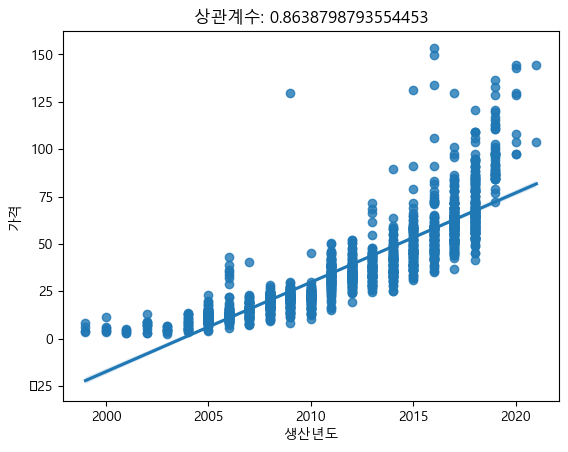

In [37]:
focus = df[(df['차량모델명'] == 'focus')]

regplot(focus, '배기량')
regplot(focus, '연평균주행거리')
regplot(focus, '주행거리')
regplot(focus, '생산년도')

> 생산년도와 주행거리가 가장 높은 상관계수를 보이는 것으로 확인.
>> 배기량이 높을수록 오히려 **음의 상관계수**를 보이는 것을 확인.<br>
연식과 주행거리는 모든 데이터에서 높은 상관계수를 보이고 있으므로,<br>
데이터의 분포로 볼 때 저가형모델과 고가형 모델이 존재하는 것으로 추정

> 저가형과 고가형모델을 나누어 준다면? ~~TODO로 남겨두자~~

### 2.2. 지역

In [38]:
len(df['판매도시'].unique()), len(df['판매구역'].unique())

(3224, 17)

In [39]:
df['판매구역'].value_counts()

MAZ    10680
SLA     7379
WIE     6805
MAL     4654
DOL     4521
LOD     3448
POM     3436
LUB     2577
KUJ     2511
ZAC     2035
POD     1822
SWI     1776
WAR     1546
LUU     1402
POL     1058
OPO     1028
MOR       17
Name: 판매구역, dtype: int64

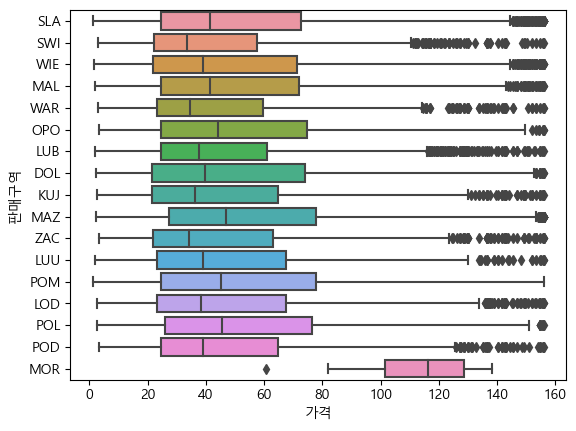

In [40]:
sns.boxplot(x='가격', y='판매구역', data=df)
plt.show()

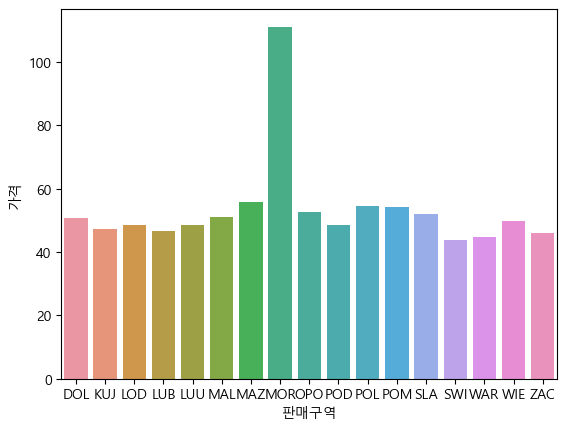

In [41]:
mean_prices = df.groupby('판매구역')['가격'].mean().reset_index()

sns.barplot(x='판매구역', y='가격', data=mean_prices)
plt.show()

> 모로코 지역의 마라캐시공항을 제외하곤 모두 비슷한 평균 가격 값을 보임.

In [42]:
df[df['판매구역'] == 'MOR'].shape[0]

17

> MOR의 개수가 매우 적어 MOR을 제외했을 때 평균가격은 40~60 사이로 해당 컬럼의 의미가 크다고 볼 수 없음.

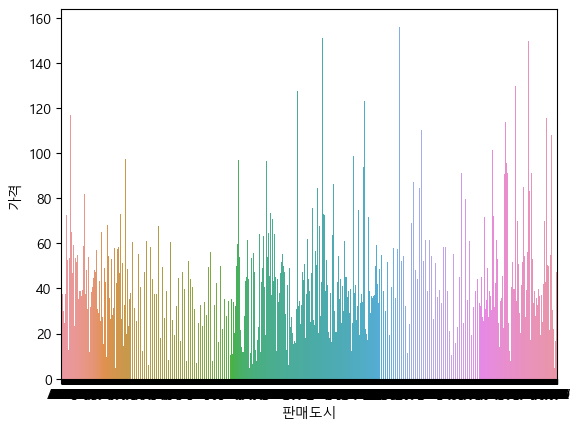

In [43]:
# 마라캐시 공항을 제거하고 도시별 평균 가격 차트 보기
not_MOR = df[df['판매구역'] != 'MOR']
mean_prices = not_MOR.groupby('판매도시')['가격'].mean().reset_index()

sns.barplot(x='판매도시', y='가격', data=mean_prices)
plt.show()


In [44]:
df['판매도시'].value_counts()

WAR    3127
KRA    1197
WRO    1116
LOD    1038
POZ     956
       ... 
MVH       1
CIB       1
CED       1
FNQ       1
ZDZ       1
Name: 판매도시, Length: 3224, dtype: int64


    WAR 지역의 astra 평균 가격: 52.91286821705427
    다른 지역들의 astra 평균 가격 : 39.96325932132383
    


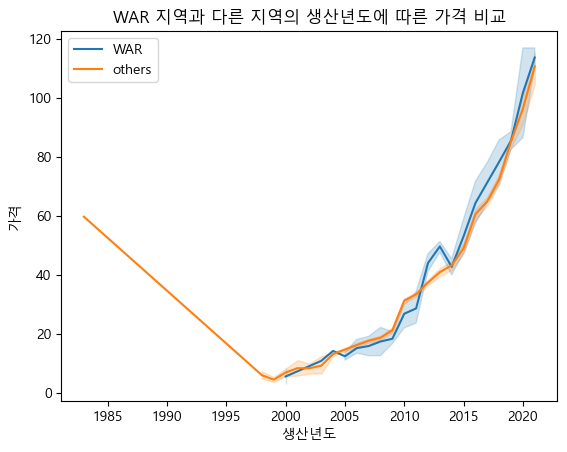

In [45]:
# WAR 값으로 비교

astra_WAR = df[(df['판매도시'] == 'WAR') & (df['차량모델명'] == 'astra')]
astra_others = df[(df['판매도시'] != 'WAR') & (df['차량모델명'] == 'astra')]

print(f'''
    WAR 지역의 astra 평균 가격: {astra_WAR['가격'].mean()}
    다른 지역들의 astra 평균 가격 : {astra_others['가격'].mean()}
    ''')
sns.lineplot(data=astra_WAR, x='생산년도', y='가격', label='WAR')
sns.lineplot(data=astra_others, x='생산년도', y='가격', label='others')

plt.title('WAR 지역과 다른 지역의 생산년도에 따른 가격 비교')
plt.legend()
plt.show()

> 판매도시 역시 무의미하다고 판단.

## 3. 스케일링

In [46]:
print(f'''
      평균
      ----------------------------
      {df.mean()}  
      분산
      ----------------------------
      {df.var()}
      ''')


      평균
      ----------------------------
      생산년도            2011.15
주행거리          171426.41
배기량             1799.36
압축천연가스(CNG)        0.00
경유                 0.43
가솔린                0.51
하이브리드              0.01
액화석유가스(LPG)        0.05
가격                50.95
연평균주행거리        17150.14
dtype: float64  
      분산
      ----------------------------
      생산년도                  25.23
주행거리          6344264138.09
배기량               296288.70
압축천연가스(CNG)            0.00
경유                     0.25
가솔린                    0.25
하이브리드                  0.01
액화석유가스(LPG)            0.04
가격                  1191.84
연평균주행거리         66623229.69
dtype: float64
      


C:\Users\user\AppData\Local\Temp\ipykernel_12916\3066652024.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.mean()}
C:\Users\user\AppData\Local\Temp\ipykernel_12916\3066652024.py:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.var()}


가장 상관계수가 높은 생산년도에 비해 주행거리와 배기량이 높은 분산도를 갖고있다.

In [47]:
df['주행거리'] = np.log(df['주행거리'])
df['연평균주행거리'] = np.log(df['연평균주행거리'])
df['배기량'] = np.log(df['배기량'])

C:\Users\user\AppData\Local\Temp\ipykernel_12916\1508751590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주행거리'] = np.log(df['주행거리'])
C:\Users\user\AppData\Local\Temp\ipykernel_12916\1508751590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연평균주행거리'] = np.log(df['연평균주행거리'])
C:\Users\user\AppData\Local\Temp\ipykernel_12916\1508751590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [48]:
print(f'''
      평균
      ----------------------------
      {df.mean()}  
      분산
      ----------------------------
      {df.var()}
      ''')


      평균
      ----------------------------
      생산년도          2011.15
주행거리            11.89
배기량              7.46
압축천연가스(CNG)      0.00
경유               0.43
가솔린              0.51
하이브리드            0.01
액화석유가스(LPG)      0.05
가격              50.95
연평균주행거리          9.64
dtype: float64  
      분산
      ----------------------------
      생산년도            25.23
주행거리             0.45
배기량              0.07
압축천연가스(CNG)      0.00
경유               0.25
가솔린              0.25
하이브리드            0.01
액화석유가스(LPG)      0.04
가격            1191.84
연평균주행거리          0.24
dtype: float64
      


C:\Users\user\AppData\Local\Temp\ipykernel_12916\3066652024.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.mean()}
C:\Users\user\AppData\Local\Temp\ipykernel_12916\3066652024.py:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.var()}
